About Dataset

A Twitter sentiment analysis is the process of determining the emotional tone behind a series of words, specifically on Twitter. Sentiment analysis refers to identifying as well as classifying the sentiments that are expressed in the text source. The dataset contains 10000 tweets about the keyword "Ukraine" that were scrapped using the library Tweepy which is used to access the tweets through Twitter API. The sentiment values have been found using Textblob library, and the data frames are stored in this dataset



Column Description

Tweet

Polarity

Subjectivity

Sentiment

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Suppressing warnings
warnings.filterwarnings("ignore")

# Loading the dataset
data = pd.read_csv('Ukraine_10K_tweets_sentiment_analysis.csv')

# Droping Columns 
data.drop(columns=['polarity','subjectivity','Sentiment'],inplace=True)


In [2]:
# First 5 Rows
data.head()

,Tweet
0,RT @ChristopherJM: Zelensky also confirms CIA ...
1,RT @oryxspioenkop: Russia acquired these vehic...
2,RT @RepMTG: I’m calling for an audit of every ...
3,"RT @KyivIndependent: ""Russian goal seems to be..."
4,RT @william98161886: I see Rishi just given an...


In [3]:
# Shape
data.shape

(10167, 1)

In [4]:
# Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   9999 non-null   object
dtypes: object(1)
memory usage: 79.6+ KB


In [5]:
# Dropping rows with null values
data.dropna(axis=0, inplace=True)

In [6]:
# Droping Null values
data.dropna(axis=0,inplace=True)
data.isnull().sum().sum()

0

# Performing Sentiment Analysis

In [7]:
# Our Data
df_new = data[['Tweet']]

# Import Sentiment intensity analyser function for performing sentiment analysis.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
senti = SentimentIntensityAnalyzer()

# Creating lambda function 
function = lambda x: senti.polarity_scores(x)["compound"]
function1 = lambda x: senti.polarity_scores(x)["pos"]
function2 = lambda x: senti.polarity_scores(x)["neu"]

# Applying function
df_new["polarity"] = df_new["Tweet"].apply(function)
df_new["pos"] = df_new["Tweet"].apply(function1)
df_new["neu"] = df_new["Tweet"].apply(function2)

import numpy as np

df_new["Sentiment"] = np.where(df_new["polarity"] > 0.5, "Positive",
                         np.where((df_new["polarity"] <= 0.5) & (df_new["polarity"] >= -0.5), "Neutral",
                                  np.where(df_new["polarity"] < -0.5, "Negative", None)))
df_new.head()

,Tweet,polarity,pos,neu,Sentiment
0,RT @ChristopherJM: Zelensky also confirms CIA ...,-0.4767,0.0,0.853,Neutral
1,RT @oryxspioenkop: Russia acquired these vehic...,0.0000,0.0,1.000,Neutral
2,RT @RepMTG: I’m calling for an audit of every ...,0.0000,0.0,1.000,Neutral
3,"RT @KyivIndependent: ""Russian goal seems to be...",-0.4588,0.0,0.885,Neutral
4,RT @william98161886: I see Rishi just given an...,-0.6981,0.0,0.845,Negative


In [8]:
# Lets find how many reviews are in each bucket
df_new.groupby('Sentiment').size().reset_index()

,Sentiment,0
0,Negative,2839
1,Neutral,6254
2,Positive,906


                         ---------------------------XXX---------------------------

In [9]:
# Selecting only Tweet Column
df = df_new[['Tweet','Sentiment']]
df.head()

,Tweet,Sentiment
0,RT @ChristopherJM: Zelensky also confirms CIA ...,Neutral
1,RT @oryxspioenkop: Russia acquired these vehic...,Neutral
2,RT @RepMTG: I’m calling for an audit of every ...,Neutral
3,"RT @KyivIndependent: ""Russian goal seems to be...",Neutral
4,RT @william98161886: I see Rishi just given an...,Negative


In [10]:
# 'Tweet' is the column containing the tweets in our DataFrame 'df'
df['Tweet'] = df['Tweet'].astype(str)

In [11]:
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords


# Concatenate all tweets in the DataFrame into a single string
all_tweets = ' '.join(df['Tweet'])

# Get a set of English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords and hyperlinks, then join the remaining words into a new string
filtered_tweets = ' '.join(word for word in all_tweets.split() 
                           if word.lower() not in stop_words 
                           and not re.match(r'https?://[^\s]+', word.lower()))


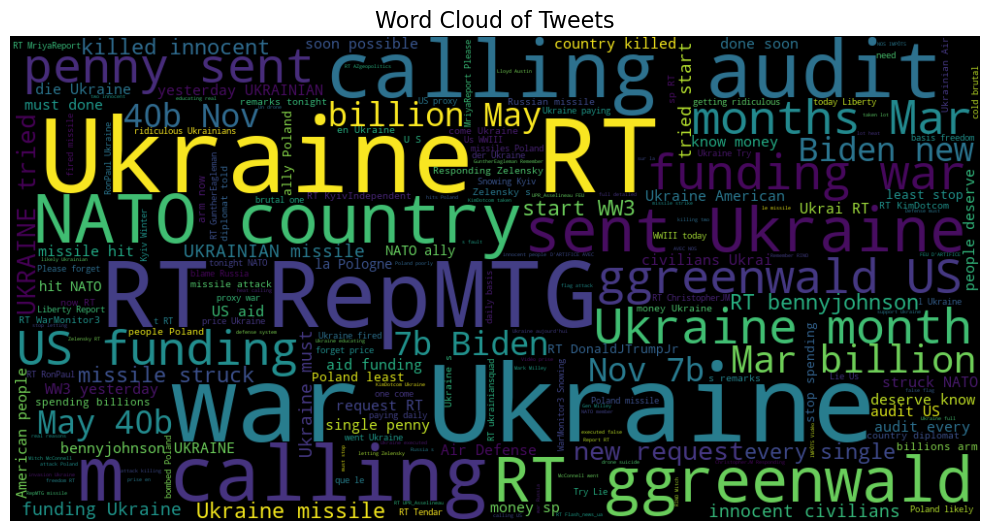

In [12]:
# PLoting Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Your existing code
wordcloud = WordCloud(width=1000, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110,
                      background_color='black',  # Set the background color
                      colormap='viridis',        # Choose a colormap for the colors
                      contour_width=1,           # Add contour lines
                      contour_color='steelblue'  # Set contour line color
                      ).generate(filtered_tweets)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud of Tweets', fontsize=16)  # Add a title
plt.axis('off')
plt.tight_layout()  # Ensure tight layout
plt.show()


In [13]:
# Text pre-processing
df['Tweet'] = df['Tweet'].str.lower().str.replace('[^a-z\']', ' ')


# Need to remove stop words and url components
cleaned_tweets = df['Tweet']
stop_words = set(stopwords.words('english'))

def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'https?://[^\s]+', '', tweet)
    # Remove stop words
    tweet = ' '.join(word for word in tweet.split() if word.lower() not in stop_words)
    return tweet

cleaned_tweets = cleaned_tweets.apply(preprocess_tweet)
df['Tweet'] = cleaned_tweets
df.head()

,Tweet,Sentiment
0,rt christopherjm zelensky also confirms cia di...,Neutral
1,rt oryxspioenkop russia acquired vehicles seco...,Neutral
2,rt repmtg calling audit every single penny sen...,Neutral
3,rt kyivindependent russian goal seems entrench...,Neutral
4,rt william see rishi given another half billio...,Negative


In [14]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Neutral     6254
Negative    2839
Positive     906
Name: Sentiment, dtype: int64

# Feature Encoding

In [15]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
lb = LabelEncoder()

# Assuming 'column_name' is the column in your DataFrame that you want to encode
df['Sentiment'] = lb.fit_transform(df['Sentiment'])

# Values Counts
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

1    6254
0    2839
2     906
Name: Sentiment, dtype: int64

### Here, 
        1 -- Neutral,
        2 -- Positive,
        0 -- Negative

# Define X and y

In [16]:
X = df['Tweet']
y = df['Sentiment']

In [17]:
# Term Frequency-Inverse Document Frequency Vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)

X = tfidf_vectorizer.fit_transform(X)

# Spliting Our Data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    train_size=0.7,
                                                    random_state=42)

# Model Building

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, 
                                       random_state=42, 
                                       n_jobs=-1)

# Train the classifier on the training data
random_forest.fit(X_train, y_train) 

# Make predictions on the training data
y_train_pred = random_forest.predict(X_train)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [20]:
# If you also want to see other metrics like classification report
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1989
           1       1.00      1.00      1.00      4370
           2       1.00      1.00      1.00       640

    accuracy                           1.00      6999
   macro avg       1.00      1.00      1.00      6999
weighted avg       1.00      1.00      1.00      6999



# Confusion Matrix

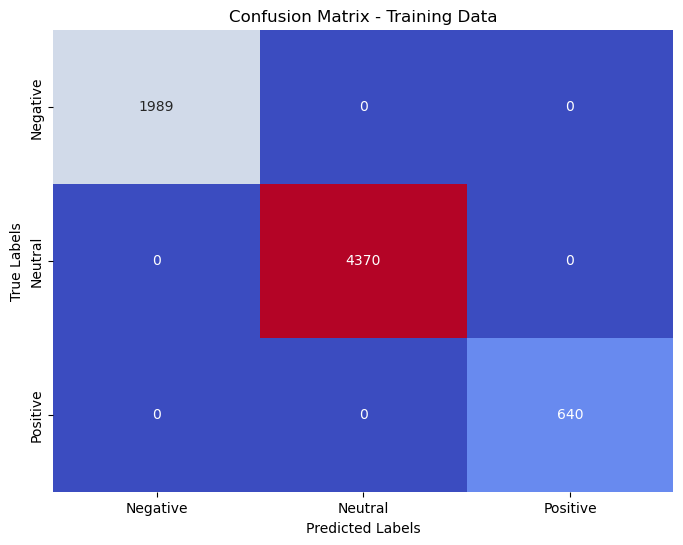

In [21]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],  # Update class labels
            yticklabels=['Negative', 'Neutral', 'Positive'])  # Update class labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data')
plt.show()


# Prdiction on Test Cases..!

In [22]:
import pandas as pd

# Assuming preprocess_tweet, tfidf_vectorizer, random_forest, lb are defined

# Sample tweets
sample_tweets = [
    "I love the beautiful landscapes of Ukraine! #AmazingCountry",
    "The situation in Ukraine is truly heartbreaking. #PrayForUkraine",
    "Just had the best meal in Kyiv! Ukrainian cuisine is incredible. #Foodie",
    "Feeling optimistic about the future. Positive vibes all the way! 😊",
    "I can't believe the recent events in Ukraine. It's so sad. #StopTheViolence",
    "Neutral on the current political situation in Ukraine. Let's hope for a peaceful resolution.",
    "Exploring the historic streets of Lviv. Such a charming city! #Travel",
    "The weather in Ukraine is gloomy today. ☔️",
    "Disappointed with the service at the hotel in Odessa. #CustomerExperience",
    "We all know Ukraine started the war.😡🤬 #SaveRussia&Soil"
]

# Create a DataFrame
sample_tweets_df = pd.DataFrame(sample_tweets, columns=['Tweet'])

# Preprocess the sample tweets
sample_tweets_processed = [preprocess_tweet(tweet) for tweet in sample_tweets_df['Tweet']]

# Transform the processed tweets using the TF-IDF vectorizer
sample_tweets_tfidf = tfidf_vectorizer.transform(sample_tweets_processed)

# Make predictions using the trained model
sample_predictions = random_forest.predict(sample_tweets_tfidf)

# Decode the numeric labels back to original sentiment labels
sample_sentiments = lb.inverse_transform(sample_predictions)

# Display the results
for tweet, sentiment in zip(sample_tweets, sample_sentiments):
    print(f'Tweet: "{tweet}"\nPredicted Sentiment: {sentiment}\n{"-"*30}')


Tweet: "I love the beautiful landscapes of Ukraine! #AmazingCountry"
Predicted Sentiment: Positive
------------------------------
Tweet: "The situation in Ukraine is truly heartbreaking. #PrayForUkraine"
Predicted Sentiment: Neutral
------------------------------
Tweet: "Just had the best meal in Kyiv! Ukrainian cuisine is incredible. #Foodie"
Predicted Sentiment: Positive
------------------------------
Tweet: "Feeling optimistic about the future. Positive vibes all the way! 😊"
Predicted Sentiment: Positive
------------------------------
Tweet: "I can't believe the recent events in Ukraine. It's so sad. #StopTheViolence"
Predicted Sentiment: Neutral
------------------------------
Tweet: "Neutral on the current political situation in Ukraine. Let's hope for a peaceful resolution."
Predicted Sentiment: Neutral
------------------------------
Tweet: "Exploring the historic streets of Lviv. Such a charming city! #Travel"
Predicted Sentiment: Positive
------------------------------
Tweet: "T

# The End..!